# Exploratory Data Analysis

In [1]:
import os
import numpy as np
from auxiliarymethods import datasets as dp
from auxiliarymethods.reader import tud_to_networkx
import pandas as pd
from sklearn.decomposition import KernelPCA, TruncatedSVD
from matplotlib import pyplot as plt
from nrkmeans import NrKmeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
import seaborn as sns
from scipy.sparse import load_npz
import auxiliarymethods.auxiliary_methods as aux
import networkx as nx
from sklearn.cluster import KMeans
from copy import deepcopy

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# utility functions
def load_csv(path):
    return np.loadtxt(path, delimiter=";")

def load_sparse(path):
    return load_npz(path)

def select_from_list(l, indices):
    return [l[i] for i in indices]

## Overview of NMI performance for different representations

### KPCA
Applied [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) with the provided Gram matrix and then clustered the reduced representation with Subkmeans with $k=$'number of ground truth classes'.


### SVD
Applied [Truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) a version of SVD that can handle sparse feature matrices and then clustered the reduced representation with Subkmeans with $k=$'number of ground truth classes'.

### Spectral Clustering
Applied [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html), an algorithm that is often used to cluster graph data, with the similarities provided by the Gram matrices and with $k=$'number of ground truth classes'. In contrast to Subkmeans Spectral Clustering can find arbitrarily shaped clusters.

#################node_labels#################


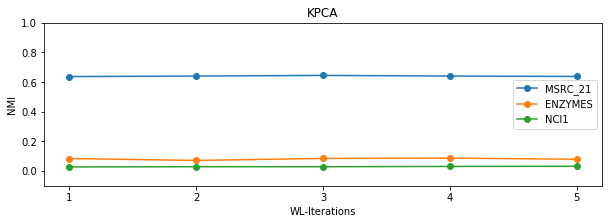

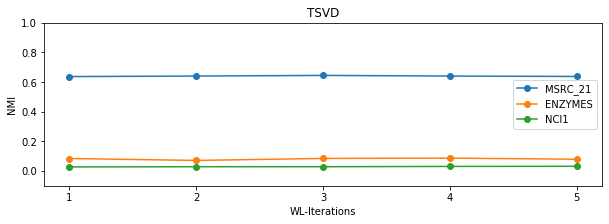

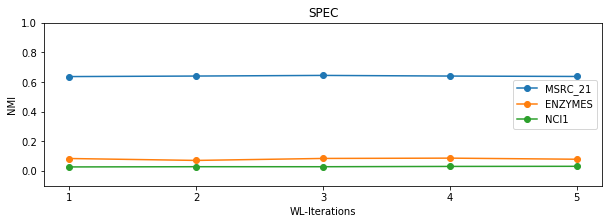

#################without_labels#################


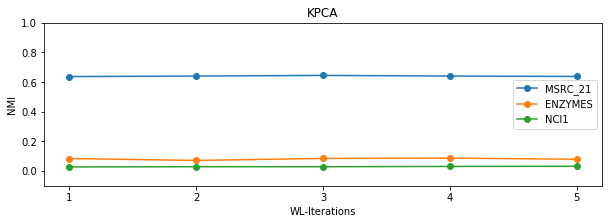

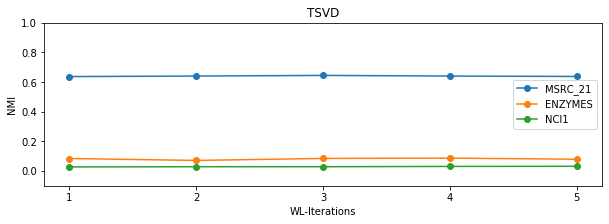

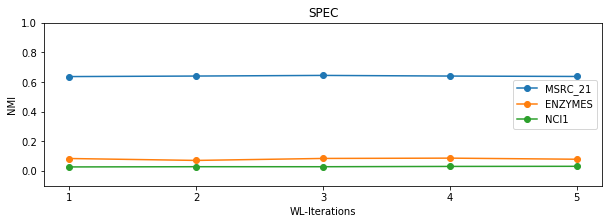

In [3]:
result_names = ["KPCA", "TSVD", "SPEC"]
for version in ["node_labels", "without_labels"]:
    print(f"#################{version}#################")
    for name_i in result_names:
        path_i = os.path.join('graph_representations', 'node_labels', 'KPCA.csv')
        nmi_df = pd.read_csv(path_i, index_col=0)
        fig, ax = plt.subplots(figsize=(10,3))
        ax.set_ylabel("NMI")
        ax.set_xlabel("WL-Iterations")
        ax.set_ylim([-0.1,1])
        ax.set_xticks([0,1,2,3,4])
        ax.set_xticklabels([1,2,3,4,5])
        ax.set_title(name_i)
        nmi_df.plot(marker="o", ax=ax)
        plt.show();

As we can see, for the clustering accuracies for the ENZYMES dataset it does not matter if node labels are included or not. This can be explained by the fact that ENZYMES dataset is highly dimensional and one additional dimension containing ground truth kind of gets lost and is not enough to improve clustering results. 

For different clustering algorithms the accuracy stays at around 10%. This can be explained by the fact that the data does not contain any well defined clusters independently of the dimensions or data rotations used, which can be see in the following sections.

## KPCA, TSVD, SPEC for different ENZYMES representations

In [4]:
reduced_kpca_dict = {}
reduced_tsvd_dict = {}

base_path = os.path.join("kernels","node_labels")
dataset = "ENZYMES"
nmis_tsvd = {}
nmis_spec = {}
nmis_kpca = {}

classes = dp.get_dataset(dataset)
representations = ["wl1", "wl2", "wl3", "wl4", "wl5", "graphlet", "shortestpath"]

Dataset ENZYMES
##################################
Representation wl1
##################################
(600, 600) (600, 9658)
n_clusters:  6
TSVD


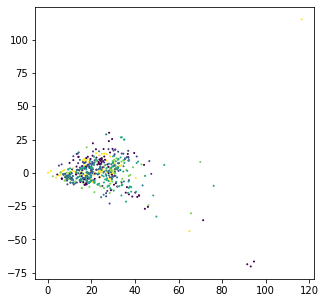

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0524


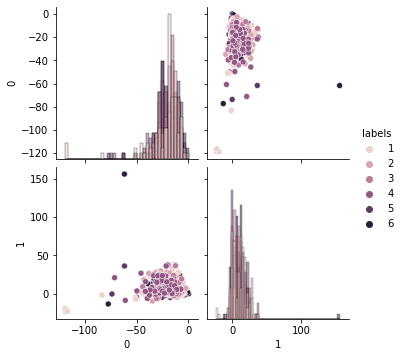

KPCA


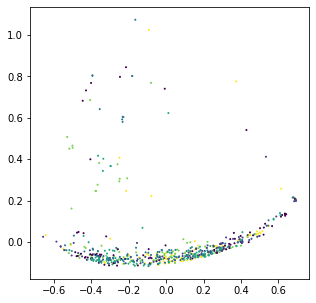

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0832


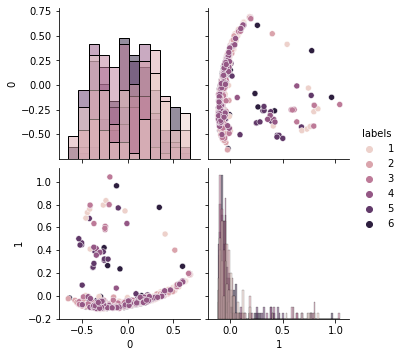

Spectral  NMI:0.0544
##################################
##################################
Representation wl2
##################################
(600, 600) (600, 25577)
n_clusters:  6
TSVD


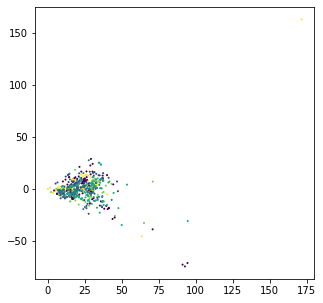

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0524


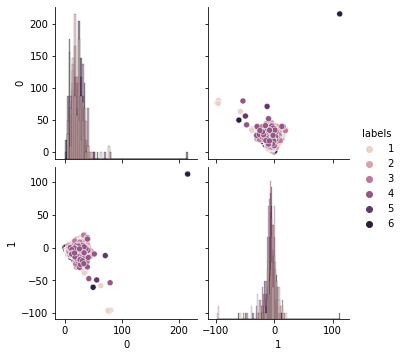

KPCA


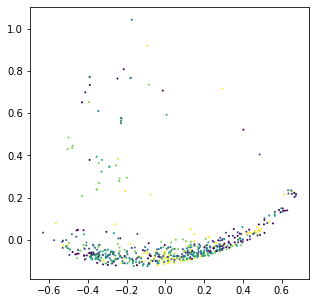

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0723


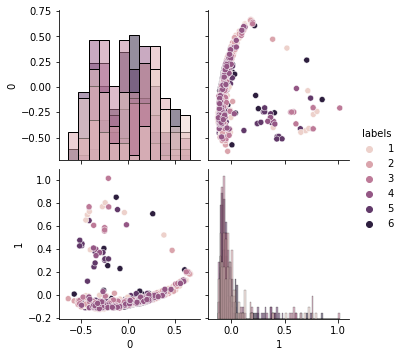

Spectral  NMI:0.0502
##################################
##################################
Representation wl3
##################################
(600, 600) (600, 42457)
n_clusters:  6
TSVD


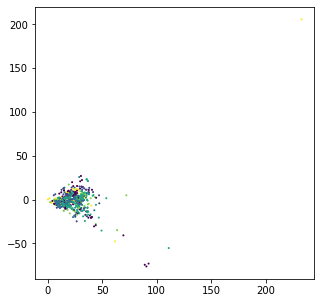

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0497


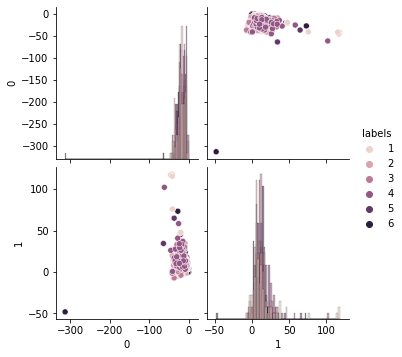

KPCA


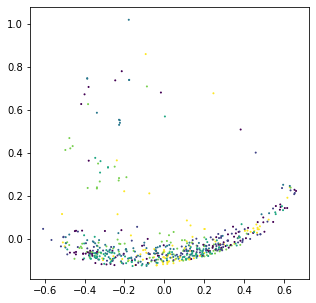

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0804


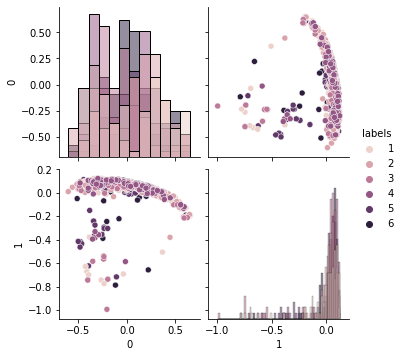

Spectral  NMI:0.0546
##################################
##################################
Representation wl4
##################################
(600, 600) (600, 59599)
n_clusters:  6
TSVD


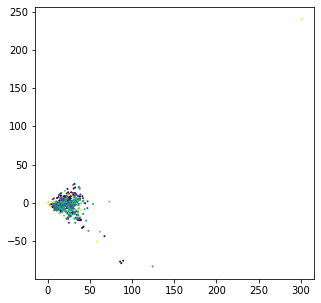

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0505


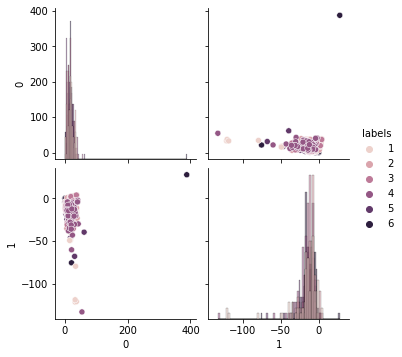

KPCA


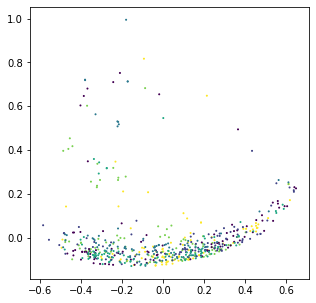

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0834


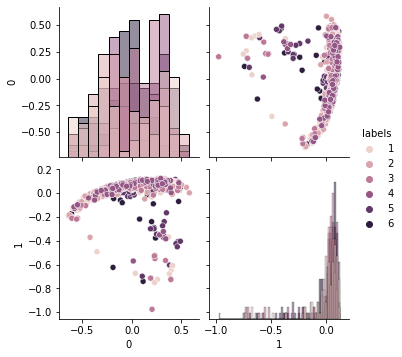

Spectral  NMI:0.0494
##################################
##################################
Representation wl5
##################################
(600, 600) (600, 76881)
n_clusters:  6
TSVD


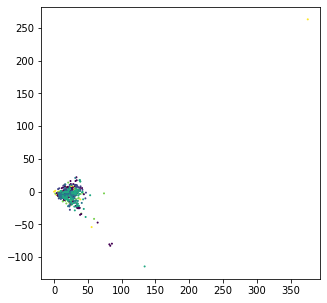

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0552


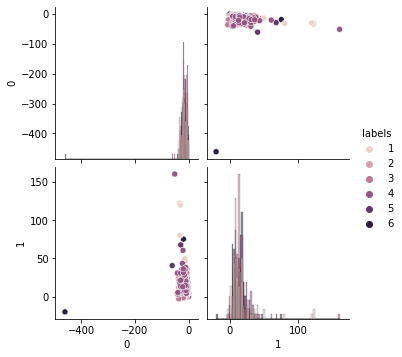

KPCA


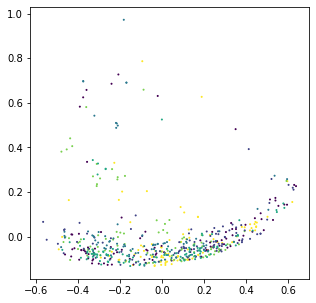

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0878


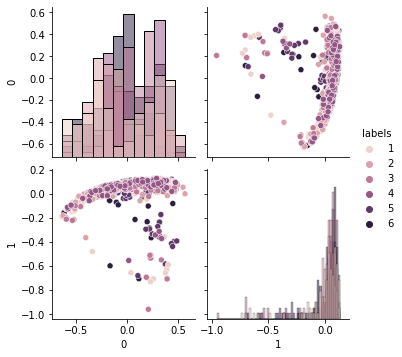

Spectral  NMI:0.0558
##################################
##################################
Representation graphlet
##################################
(600, 600) (600, 3455)
n_clusters:  6
TSVD


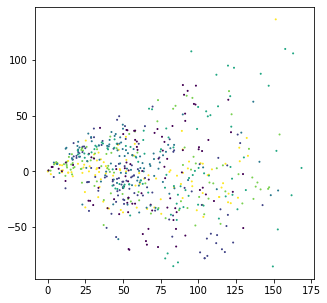

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0651


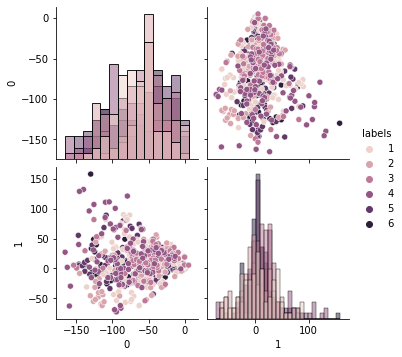

KPCA


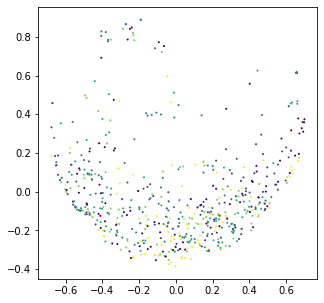

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0603


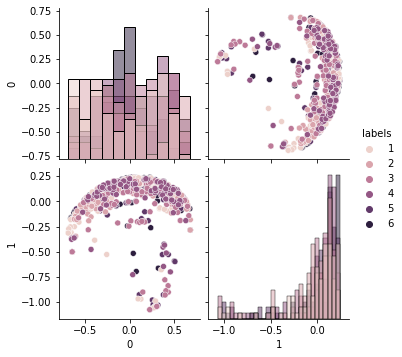

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Spectral  NMI:0.0440
##################################
##################################
Representation shortestpath
##################################
(600, 600) (600, 25460)
n_clusters:  6
TSVD


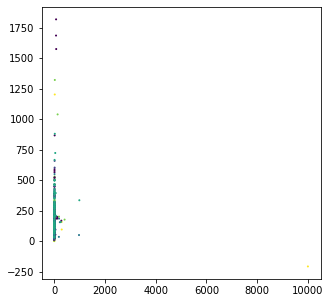

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0385


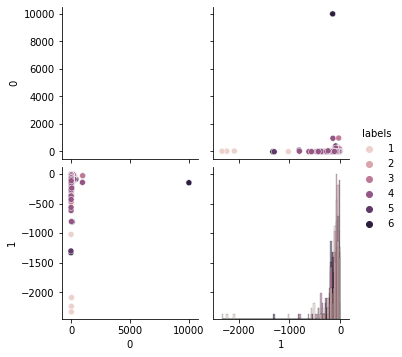

KPCA


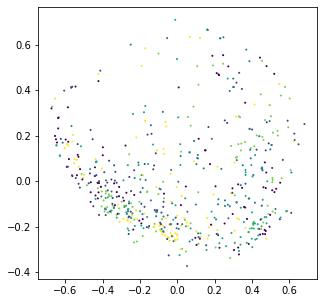

Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0757


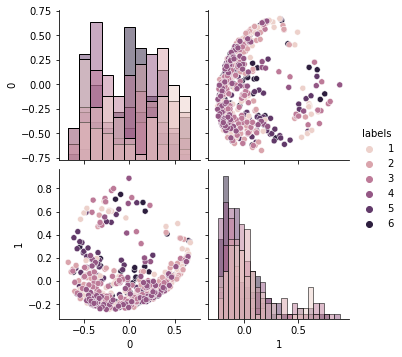

Spectral  NMI:0.0395
##################################


In [5]:
print("Dataset", dataset)

for representation in representations:
    print("##################################")
    print("Representation", representation)
    print("##################################")

    #Gram Matrix for the Weisfeiler-Lehman subtree kernel
    gram = load_csv(os.path.join(base_path,f"{dataset}_gram_matrix_{representation}.csv"))
    gram = aux.normalize_gram_matrix(gram)

    #Sparse Vectors for the Weisfeiler-Lehmann subtree kernel
    vec = load_sparse(os.path.join(base_path,f"{dataset}_vectors_{representation}.npz"))
    print(gram.shape, vec.shape)

    tsvd = TruncatedSVD(n_components=100)
    reduced_tsvd = tsvd.fit_transform(vec)

    kpca = KernelPCA(n_components=100, kernel="precomputed")
    reduced_kpca = kpca.fit_transform(gram)

    reduced_kpca_dict[f'{representation}'] = reduced_kpca
    reduced_tsvd_dict[f'{representation}'] = reduced_tsvd

    k = len(set(classes.tolist()))
    print("n_clusters: ", k)
    d = {0:"TSVD",1:"KPCA"}
    n_d = {0:nmis_tsvd, 1:nmis_kpca}
    for i,rep_i in enumerate([reduced_tsvd, reduced_kpca]):
        print(d[i])

        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(rep_i[:,0], rep_i[:,1], c=classes, s=1)
        plt.show();

        # Apply Subkmeans
        nrkm = NrKmeans(n_clusters=[k,1])#, allow_larger_noise_space=False)
        nrkm.fit(rep_i, best_of_n_rounds=10, verbose=False)
        print("Found Cluster Subspaces: ", nrkm.m)
        subkm_nmi = normalized_mutual_info_score(nrkm.labels[0],classes)
        print(f"Subkmeans NMI:{subkm_nmi:.4f}")    
        n_d[i][representation] = subkm_nmi
        # Plot rotated space
        V = nrkm.V
        rotated = np.dot(rep_i,V)
        reduced_df = pd.DataFrame(rotated[:,0:2])
        reduced_df["labels"] = classes#nrkm.labels[0]
        sns.pairplot(reduced_df, hue="labels", diag_kind="hist")
        plt.show();

    # Apply Spectral Clustering
    spec = SpectralClustering(n_clusters=k, affinity="precomputed")
    spec.fit(gram)
    spec_nmi = normalized_mutual_info_score(spec.labels_,classes)
    nmis_spec[representation] = spec_nmi
    print(f"Spectral  NMI:{spec_nmi:.4f}")   

    print("##################################")

In [6]:
res = {"KPCA":nmis_kpca,"TSVD": nmis_tsvd, "SPEC": nmis_spec}
for key, value in res.items():
    print(key)
    for (representation, nmi) in value.items():
        print(representation, ":", nmi)

KPCA
wl1 : 0.08315677169523324
wl2 : 0.07231319770036077
wl3 : 0.08044463770666312
wl4 : 0.08343379890915235
wl5 : 0.08777433620614972
graphlet : 0.06030153616590428
shortestpath : 0.0756875323581483
TSVD
wl1 : 0.05243966727420343
wl2 : 0.052362867442695735
wl3 : 0.049669654043973804
wl4 : 0.05050098767938773
wl5 : 0.05517521951730047
graphlet : 0.06513871166707683
shortestpath : 0.03849183289379347
SPEC
wl1 : 0.054436374580023754
wl2 : 0.050150018691304483
wl3 : 0.05464223555821101
wl4 : 0.04942244504405299
wl5 : 0.05577443590753543
graphlet : 0.04402645626687378
shortestpath : 0.039515176018853466


As we can see, the best results were achieved by KPCA for Weisfeiler-Lehman representations (around 8%). That is why we decided to run our clustering algorithm on the data with dimensionality number reduced with KPCA.

## Visualizing and Interpreting the results

In [7]:
def visualize(G, color=None, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, 
                     pos=nx.spring_layout(G, seed=42),
                     with_labels=True,
                     node_color=color,
                     cmap="Set2")
    plt.show();

In [8]:
base_path = os.path.join("kernels", "without_labels")
ds_name = "ENZYMES"
classes = dp.get_dataset(ds_name)
G = tud_to_networkx(ds_name)
print(f"Number of graphs in data set is {len(G)}")
print(f"Number of classes {len(set(classes.tolist()))}")

Number of graphs in data set is 600
Number of classes 6


## Plot example enzyme

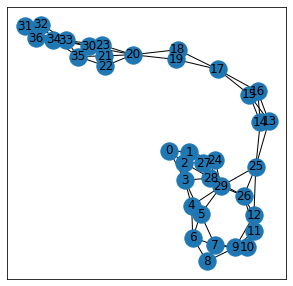

In [9]:
# We just use the first in the list
idx = 0
visualize(G[idx])

## Plot the vector representation with KernelPCA

In [10]:
representations = ["wl1", "graphlet", "shortestpath"]

for representation in representations: 
    vec = load_sparse(os.path.join(base_path,f"{ds_name}_vectors_{representation}.npz"))
    gram = load_csv(os.path.join(base_path,f"{ds_name}_gram_matrix_wl{iterations}.csv"))
    gram = aux.normalize_gram_matrix(gram)

    kpca = KernelPCA(n_components=100, kernel="precomputed")
    reduced_kpca = kpca.fit_transform(gram)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(reduced_kpca[:,0], reduced_kpca[:,1], c=classes, s=1)
    ax.set_title("Representation: " + representation)
    plt.show();

NameError: name 'iterations' is not defined

## Plot the vector representation with TruncatedSVD 

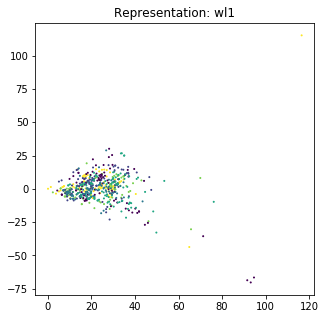

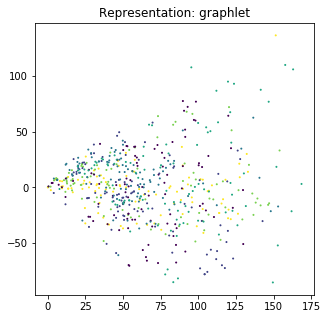

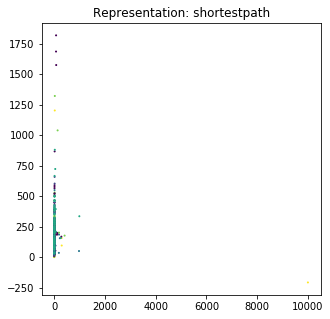

In [55]:
for representation in representations: 
    vec = load_sparse(os.path.join(base_path,f"{ds_name}_vectors_{representation}.npz"))
    tsvd = TruncatedSVD(n_components=100)
    reduced_tsvd = tsvd.fit_transform(vec)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(reduced_tsvd[:,0], reduced_tsvd[:,1], c=classes, s=1)
    ax.set_title("Representation: " + representation)
    plt.show();

## Apply Subkmeans with KernelPCA

As expected from the results above the Subkmeans model might not be well suited to find the ground truth clusters of the IMDB-BINARY data set.

In [23]:
k = len(set(classes.tolist()))
print("n_clusters: ", k)
nrkm = NrKmeans(n_clusters=[k,1], allow_larger_noise_space=True)
nrkm.fit(reduced_kpca, best_of_n_rounds=10, verbose=False)
print("Found Cluster Subspaces: ", nrkm.m)
subkm_nmi = normalized_mutual_info_score(nrkm.labels[0],classes)
print(f"Subkmeans NMI:{subkm_nmi:.4f}")    

n_clusters:  6
Found Cluster Subspaces:  [5, 95]
Subkmeans NMI:0.0314


**Plot the rotated space**

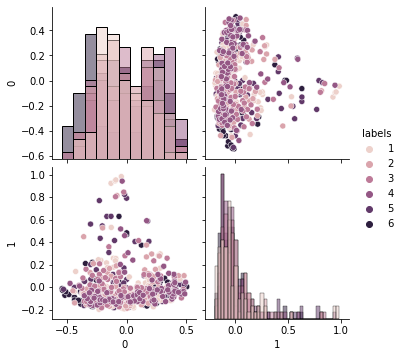

In [24]:
V = nrkm.V
rotated = np.dot(reduced_kpca,V)
reduced_df = pd.DataFrame(rotated[:,0:2])
reduced_df["labels"] = classes
sns.pairplot(reduced_df, hue="labels", diag_kind="hist")
plt.show();

## Cluster Analysis with KMeans

But, we can still use clustering to further explore the data set.
Here we use a simple technique for interpreting our cluster results for the IMBD-BINARY data set, but it works the same for the other data sets. 
We investigate the nearest neighbours of each centroid in each cluster. 

In [25]:
# only keep the first 10 components to speed up computation
reduced_kpca_10 = reduced_kpca[:, 0:10]

### First we determine the number of k clusters using a scree plot

In [26]:
costs = []
kmeans_runs = []
k_list = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40]
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_kpca_10)
    costs.append(kmeans.inertia_)
    kmeans_runs.append(deepcopy(kmeans))

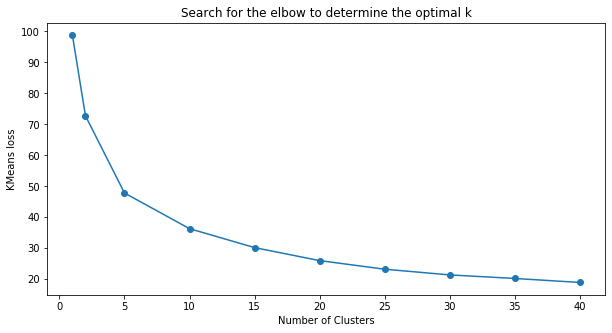

In [27]:
def scree_plot(k_list, costs):
    plt.figure(figsize=(10,5))
    plt.plot(k_list, costs, marker="o")
    plt.xlabel('Number of Clusters')
    plt.ylabel('KMeans loss')
    plt.title('Search for the elbow to determine the optimal k')
    plt.show();
scree_plot(k_list, costs)

Choose k=10

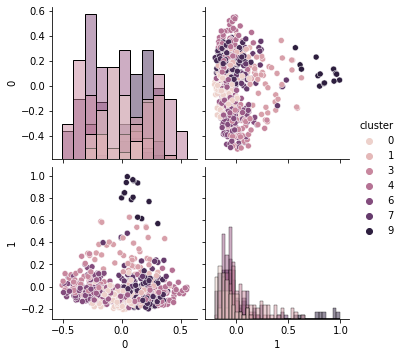

In [28]:
selected_idx = 3
kmeans = kmeans_runs[selected_idx]
df = pd.DataFrame(reduced_kpca_10[:,0:2])
df["cluster"] = kmeans.labels_
sns.pairplot(df, hue="cluster", diag_kind="hist")
plt.show();

## Plot the first n nearest neighbours of each centroid

In [29]:
from sklearn.metrics import pairwise_distances
# select first 2 nearest neighbours in for each cluster
nr_nearest = 2
nearest_indices = []
for cluster_i in set(kmeans.labels_):
    mask = (kmeans.labels_ == cluster_i)
    selection = reduced_kpca_10[mask]
    print(f"number of data points in cluster {cluster_i}: {selection.shape[0]}")
    center_i = kmeans.cluster_centers_[cluster_i].reshape(1,-1)
    distances_i = pairwise_distances(center_i, reduced_kpca_10)
    nearest_indices.append(np.argsort(distances_i, )[0][0:nr_nearest])
    print(f"Nearest data points in cluster {cluster_i}: {nearest_indices[-1]}")


number of data points in cluster 0: 70
Nearest data points in cluster 0: [449 413]
number of data points in cluster 1: 48
Nearest data points in cluster 1: [110 161]
number of data points in cluster 2: 39
Nearest data points in cluster 2: [253 429]
number of data points in cluster 3: 63
Nearest data points in cluster 3: [580 524]
number of data points in cluster 4: 73
Nearest data points in cluster 4: [552 365]
number of data points in cluster 5: 98
Nearest data points in cluster 5: [261  40]
number of data points in cluster 6: 82
Nearest data points in cluster 6: [585 176]
number of data points in cluster 7: 30
Nearest data points in cluster 7: [158 151]
number of data points in cluster 8: 83
Nearest data points in cluster 8: [545 387]
number of data points in cluster 9: 14
Nearest data points in cluster 9: [456 500]


Cluster 0, Indices [449 413]


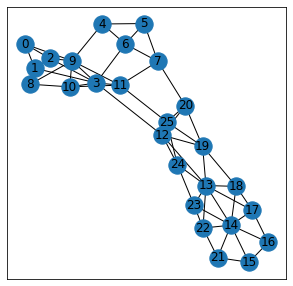

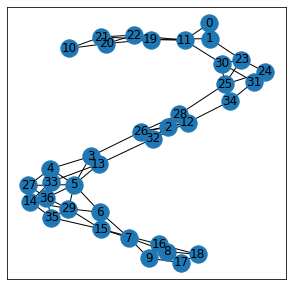

Cluster 1, Indices [110 161]


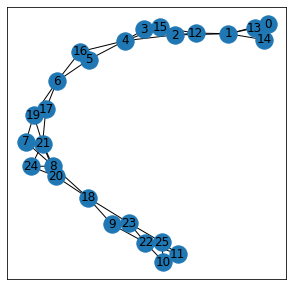

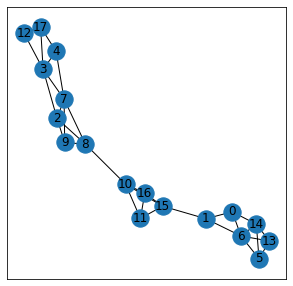

Cluster 2, Indices [253 429]


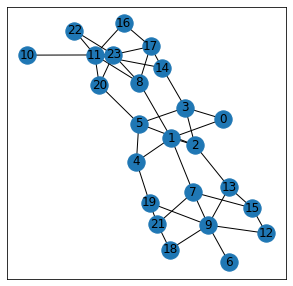

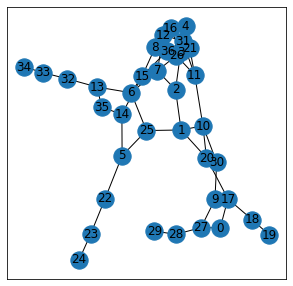

Cluster 3, Indices [580 524]


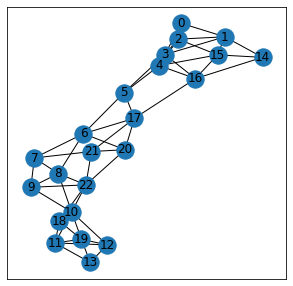

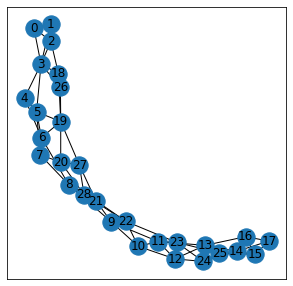

Cluster 4, Indices [552 365]


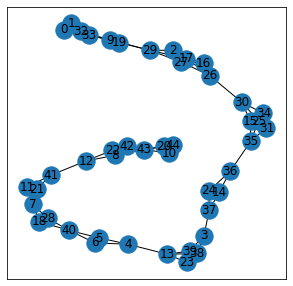

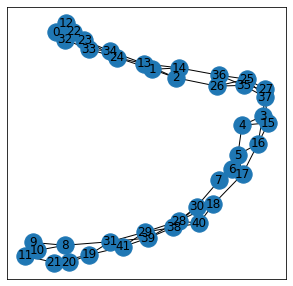

Cluster 5, Indices [261  40]


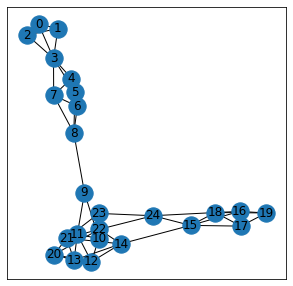

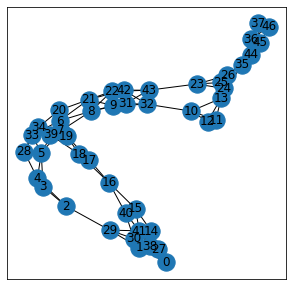

Cluster 6, Indices [585 176]


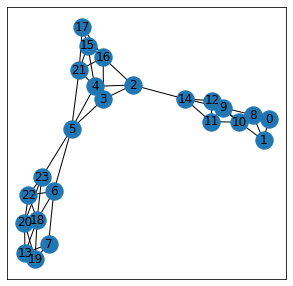

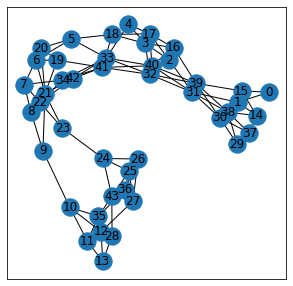

Cluster 7, Indices [158 151]


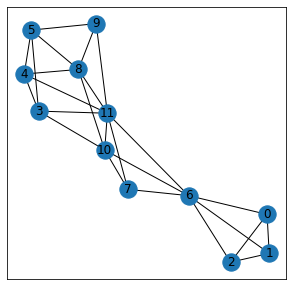

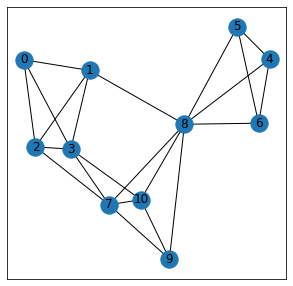

Cluster 8, Indices [545 387]


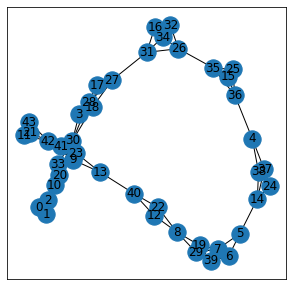

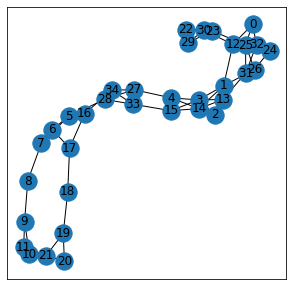

Cluster 9, Indices [456 500]


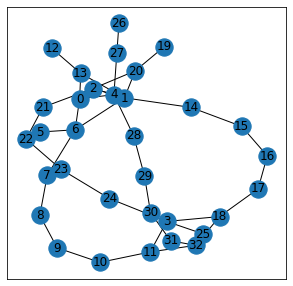

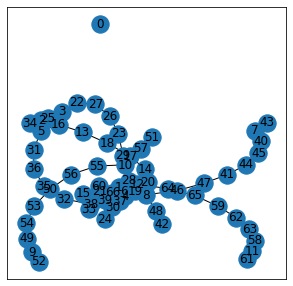

In [30]:
for i, indices in enumerate(nearest_indices):
    print(f"Cluster {i}, Indices {indices}")
    G_selected = select_from_list(G, indices)
    for g_i in G_selected:
        visualize(g_i)